In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# loading dataset
df = pd.read_csv('ocd_patient_dataset.csv')
df

,Patient ID,Age,Gender,Ethnicity,Marital Status,Education Level,OCD Diagnosis Date,Duration of Symptoms (months),Previous Diagnoses,Family History of OCD,Obsession Type,Compulsion Type,Y-BOCS Score (Obsessions),Y-BOCS Score (Compulsions),Depression Diagnosis,Anxiety Diagnosis,Medications
0,1018,32,Female,African,Single,Some College,2016-07-15,203,MDD,No,Harm-related,Checking,17,10,Yes,Yes,SNRI
1,2406,69,Male,African,Divorced,Some College,2017-04-28,180,NaN,Yes,Harm-related,Washing,21,25,Yes,Yes,SSRI
2,1188,57,Male,Hispanic,Divorced,College Degree,2018-02-02,173,MDD,No,Contamination,Checking,3,4,No,No,Benzodiazepine
3,6200,27,Female,Hispanic,Married,College Degree,2014-08-25,126,PTSD,Yes,Symmetry,Washing,14,28,Yes,Yes,SSRI
4,5824,56,Female,Hispanic,Married,High School,2022-02-20,168,PTSD,Yes,Hoarding,Ordering,39,18,No,No,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,5374,38,Male,Hispanic,Divorced,College Degree,2019-01-10,53,MDD,No,Contamination,Washing,21,33,Yes,Yes,SSRI
1496,5013,19,Female,Hispanic,Divorced,Graduate Degree,2022-09-14,160,GAD,Yes,Hoarding,Praying,25,16,Yes,Yes,SSRI
1497,6089,40,Male,Asian,Married,Some College,2018-03-13,100,NaN,Yes,Contamination,Counting,2,15,Yes,Yes,Benzodiazepine
1498,3808,37,Female,Caucasian,Married,Some College,2018-04-14,210,GAD,Yes,Contamination,Washing,16,7,Yes,No,Benzodiazepine


In [9]:
#checking the dimensions of the dataset
print('Dataset dimension: ', df.shape)

# checking attributes
print('Attributes in the dataset: ', df.columns.values)

Dataset dimension:  (1500, 17)
Attributes in the dataset:  ['Patient ID' 'Age' 'Gender' 'Ethnicity' 'Marital Status'
 'Education Level' 'OCD Diagnosis Date' 'Duration of Symptoms (months)'
 'Previous Diagnoses' 'Family History of OCD' 'Obsession Type'
 'Compulsion Type' 'Y-BOCS Score (Obsessions)'
 'Y-BOCS Score (Compulsions)' 'Depression Diagnosis' 'Anxiety Diagnosis'
 'Medications']


In [10]:
#storing duplicates
duplicates = df[df.duplicated()]

#view the dropped duplicates
print(duplicates)

#remove duplicates
df = df.drop_duplicates()

Empty DataFrame
Columns: [Patient ID, Age, Gender, Ethnicity, Marital Status, Education Level, OCD Diagnosis Date, Duration of Symptoms (months), Previous Diagnoses, Family History of OCD, Obsession Type, Compulsion Type, Y-BOCS Score (Obsessions), Y-BOCS Score (Compulsions), Depression Diagnosis, Anxiety Diagnosis, Medications]
Index: []


In [11]:
#top level overview of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 17 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Patient ID                     1500 non-null   int64 
 1   Age                            1500 non-null   int64 
 2   Gender                         1500 non-null   object
 3   Ethnicity                      1500 non-null   object
 4   Marital Status                 1500 non-null   object
 5   Education Level                1500 non-null   object
 6   OCD Diagnosis Date             1500 non-null   object
 7   Duration of Symptoms (months)  1500 non-null   int64 
 8   Previous Diagnoses             1252 non-null   object
 9   Family History of OCD          1500 non-null   object
 10  Obsession Type                 1500 non-null   object
 11  Compulsion Type                1500 non-null   object
 12  Y-BOCS Score (Obsessions)      1500 non-null   int64 
 13  Y-B

In [16]:
# remove 'Patient ID' from analysis
if 'Patient ID' in df.columns:
    df.drop(columns=['Patient ID'], axis=1, inplace=True)

# rename columns
df.rename({'Marital Status':'MaritalStatus',
            'Educational Level':'EducationLevel',
            'OCD Diagnosis Date':'DiagnosisDate',
            'Duration of Symptoms (months)':'SymptomsDuration',
            'Previous Diagnoses':'PreviousDiagnoses',
            'Family History of OCD':'FamilyHistory',
            'Obsession Type':'ObsessionType',
            'Compulsion Type':'CompulsionType',
            'Y-BCOS Score (Obsessions)':'ObsessionScore',
            'Y-BCOS Score(Compulsions)':'CompulsionScore',
            'Depression Diagnosis':'DepressionDiagnosis',
            'Anxiety Diagnosis':'AnxietyDiagnosis'}, axis=1, inplace=True)

#relocate column 'DiagnosisDate'
diagnosed_date = df.pop('DiagnosisDate')
df.insert(0, 'DiagnosisDate', diagnosed_date)

#convert the data type 'DiagnosisDate to datetime
df['DiagnosisDate'] = pd.to_datetime(df['DiagnosisDate'], format='%Y-%m-%d')

In [17]:
df.head()

,DiagnosisDate,Age,Gender,Ethnicity,MaritalStatus,Education Level,SymptomsDuration,PreviousDiagnoses,FamilyHistory,ObsessionType,CompulsionType,Y-BOCS Score (Obsessions),Y-BOCS Score (Compulsions),DepressionDiagnosis,AnxietyDiagnosis,Medications
0,2016-07-15,32,Female,African,Single,Some College,203,MDD,No,Harm-related,Checking,17,10,Yes,Yes,SNRI
1,2017-04-28,69,Male,African,Divorced,Some College,180,NaN,Yes,Harm-related,Washing,21,25,Yes,Yes,SSRI
2,2018-02-02,57,Male,Hispanic,Divorced,College Degree,173,MDD,No,Contamination,Checking,3,4,No,No,Benzodiazepine
3,2014-08-25,27,Female,Hispanic,Married,College Degree,126,PTSD,Yes,Symmetry,Washing,14,28,Yes,Yes,SSRI
4,2022-02-20,56,Female,Hispanic,Married,High School,168,PTSD,Yes,Hoarding,Ordering,39,18,No,No,NaN


In [18]:
df.isnull().sum()

,0
DiagnosisDate,0
Age,0
Gender,0
Ethnicity,0
MaritalStatus,0
Education Level,0
SymptomsDuration,0
PreviousDiagnoses,248
FamilyHistory,0
ObsessionType,0


In [19]:
#finding mode of the 'PreviousDiagnosis' column
previous_diagnoses_mode = df['PreviousDiagnoses'].mode()[0]

#find mode of 'Medications'
medications_mode = df['Medications'].mode()[0]

#completing missing values
df['PreviousDiagnoses'].fillna(previous_diagnoses_mode, inplace=True)
df['Medications'].fillna(medications_mode, inplace=True)
df

<ipython-input-19-cba85e9d82c1>:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['PreviousDiagnoses'].fillna(previous_diagnoses_mode, inplace=True)
<ipython-input-19-cba85e9d82c1>:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inp

,DiagnosisDate,Age,Gender,Ethnicity,MaritalStatus,Education Level,SymptomsDuration,PreviousDiagnoses,FamilyHistory,ObsessionType,CompulsionType,Y-BOCS Score (Obsessions),Y-BOCS Score (Compulsions),DepressionDiagnosis,AnxietyDiagnosis,Medications
0,2016-07-15,32,Female,African,Single,Some College,203,MDD,No,Harm-related,Checking,17,10,Yes,Yes,SNRI
1,2017-04-28,69,Male,African,Divorced,Some College,180,MDD,Yes,Harm-related,Washing,21,25,Yes,Yes,SSRI
2,2018-02-02,57,Male,Hispanic,Divorced,College Degree,173,MDD,No,Contamination,Checking,3,4,No,No,Benzodiazepine
3,2014-08-25,27,Female,Hispanic,Married,College Degree,126,PTSD,Yes,Symmetry,Washing,14,28,Yes,Yes,SSRI
4,2022-02-20,56,Female,Hispanic,Married,High School,168,PTSD,Yes,Hoarding,Ordering,39,18,No,No,Benzodiazepine
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,2019-01-10,38,Male,Hispanic,Divorced,College Degree,53,MDD,No,Contamination,Washing,21,33,Yes,Yes,SSRI
1496,2022-09-14,19,Female,Hispanic,Divorced,Graduate Degree,160,GAD,Yes,Hoarding,Praying,25,16,Yes,Yes,SSRI
1497,2018-03-13,40,Male,Asian,Married,Some College,100,MDD,Yes,Contamination,Counting,2,15,Yes,Yes,Benzodiazepine
1498,2018-04-14,37,Female,Caucasian,Married,Some College,210,GAD,Yes,Contamination,Washing,16,7,Yes,No,Benzodiazepine


In [20]:
df['Gender']=df['Gender'].apply(lambda x: 1 if x.lower() == 'female' else 0)
df['Gender']

,Gender
0,1
1,0
2,0
3,1
4,1
...,...
1495,0
1496,1
1497,0
1498,1


In [21]:
#define mapping
previous_diagnoses_mapping = {
    'MDD': 0,
    'GAD': 1,
    'Panic Disorder': 2,
    'PTSD': 3
}

#apply the mapping to the 'PreviousDiagnos' column
df['PreviousDiagnoses'] = df['PreviousDiagnoses'].map(previous_diagnoses_mapping)

In [22]:
#define mapping
education_level_mapping = {
    'High School': 0,
    'Some College': 1,
    'College Degree': 2,
    'Graduate Degree': 3
}
df['Education Level']=df['Education Level'].map(education_level_mapping)

In [23]:
#define mapping
marital_status_mapping = {
    'Single':0,
    'Married':1,
    'Divorced':2
}

df['MaritalStatus']=df['MaritalStatus'].map(marital_status_mapping)

In [24]:
#define mapping
ethnicity_mapping = {
    'Caucasian':0,
    'Asian':1,
    'African':2,
    'Hispanic':3
}

df['Ethnicity']=df['Ethnicity'].map(ethnicity_mapping)

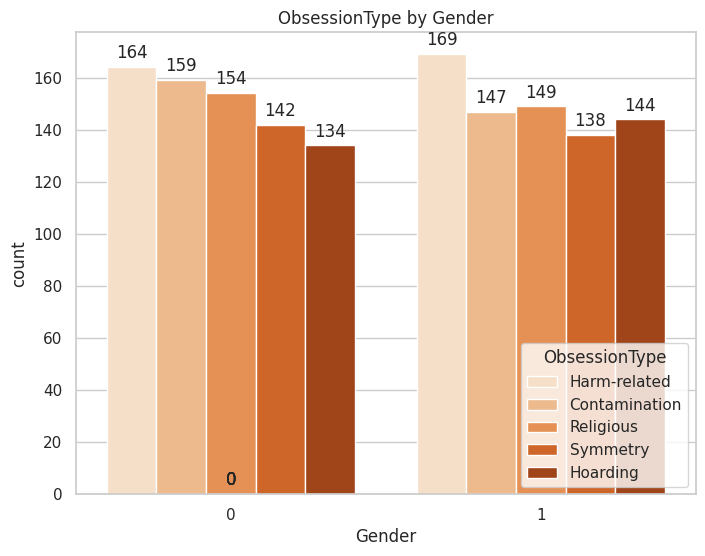

In [25]:
#create the bar plot
plt.figure(figsize=(8,6))
sns.set(style="whitegrid")

#create the count plot with specified palette
plot = sns.countplot(data=df, x='Gender', hue='ObsessionType', palette='Oranges')

#set the background color
sns.set(rc={'axes.facecolor':'lightblue', 'figure.facecolor':'lightblue'})

#add a title by
plt.title('ObsessionType by Gender')

#add data labels
for p in plot.patches:
    plot.annotate(format(p.get_height(), '.0f'),
                 (p.get_x() + p.get_width()/2., p.get_height()),
                 ha = 'center', va='center',
                 xytext = (0, 10),
                 textcoords='offset points')

#show the plot
plt.show()

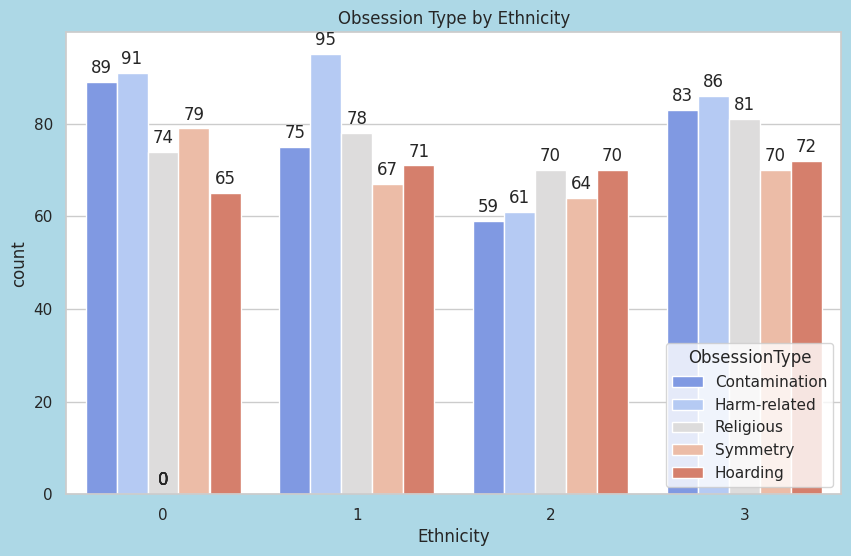

In [26]:
#setting background color
sns.set(rc={'axes.facecolor':'lightblue', 'figure.facecolor':'lightblue'})

#create the bar plot
plt.figure(figsize=(10,6))
sns.set(style="whitegrid")
plot = sns.countplot(data=df, x='Ethnicity', hue='ObsessionType', palette='coolwarm')

#adding title
plt.title('Obsession Type by Ethnicity')

#adding data labels
for p in plot.patches:
    plot.annotate(format(p.get_height(),'.0f'),
                  (p.get_x()+p.get_width()/2.,p.get_height()),
    ha='center', va='center',
    xytext=(0,10),
    textcoords='offset points')

#displaying plots
plt.show()
